In [10]:
import numpy as np
import matplotlib.pyplot as plt

from alpub_autoencoder.autoencoder_utils import read_payri_images
from alpub_autoencoder.image_processor_utils import smoothen_image
from alpub_autoencoder.image_processor_utils import apply_adaptive_thresholding
from alpub_autoencoder.image_processor_utils import apply_erosion_dialiation
from alpub_autoencoder.image_processor_utils import remove_disconnected_regions
from alpub_autoencoder.image_processor_utils import apply_otsu_thresholding

from PIL import Image

%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
PAPYRI_BASE= '../../Datasets/alpub_v2/papyri_images'

In [13]:
img_list = read_payri_images(PAPYRI_BASE)

D:\MSc - Birmingham\MSc Project\Vesuvius\alpub_autoencoder\autoencoder_utils.py:131: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [14]:
img_list.shape

(6756,)

In [15]:
# Convert the RGB images to grayscale
img_gray = []
for img in img_list:
    image_gray = Image.fromarray(img).convert("L")
    img_gray.append(np.array(image_gray))

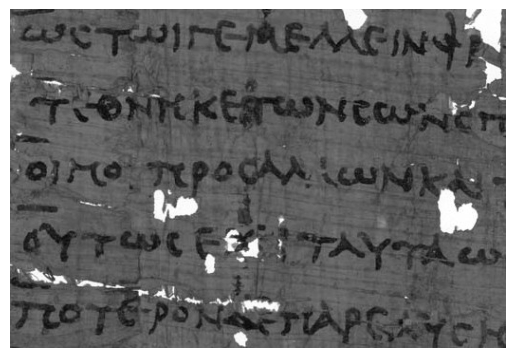

In [27]:
# Load the greyscaled image

image_no = 1
image = img_gray[image_no]

# Display the grayscale image
plt.imshow(image, cmap="gray")
plt.axis("off")
plt.show()

In [28]:
import cv2

In [29]:
# Apply smoothing
image_smooth = smoothen_image(image, kernel_size=3)

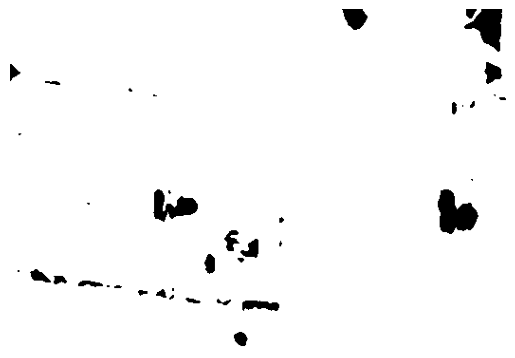

In [30]:
#Apply Otsu's thresholding
otsu_thresholded_image = apply_otsu_thresholding(image_smooth)

# Display the thresholded image
plt.imshow(otsu_thresholded_image, cmap="gray")
plt.axis("off")
plt.show()